# Limpieza

## Encabezado

In [35]:
import csv

with open('curadov1.csv', newline='', encoding='cp1252') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)
        break

['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial', 'registro_seccional_codigo', 'registro_seccional_descripcion', 'registro_seccional_provincia', 'automotor_origen', 'automotor_anio_modelo', 'automotor_tipo_codigo', 'automotor_tipo_descripcion', 'automotor_marca_codigo', 'automotor_marca_descripcion', 'automotor_modelo_codigo', 'automotor_modelo_descripcion', 'automotor_uso_codigo', 'automotor_uso_descripcion', 'titular_tipo_persona', 'titular_domicilio_localidad', 'titular_domicilio_provincia', 'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento', 'titular_porcentaje_titularidad', 'titular_domicilio_provincia_indec_id', 'titular_pais_nacimiento_indec_id']


## Diccionario de Reemplazos para limpieza

In [36]:
import csv

# Limpieza de marcas mal escritas, espacios, tipeos, etc-
reemplazos_automotor_marca_descripcion = 'reemplazos.csv'

# Marcas que tienen menos de 41 apariciones se engloban en Otros.
reemplazosOtros = 'reemplazosOtros.csv'

def carga_dict(archivo):
    reader = csv.reader(open(archivo, 'r', encoding='cp1252'))
    d = {}
    for row in reader:
        d[row[0].lower()] = row[1].lower()
    return d

In [37]:
import os
import csv

dict_automotor_marca_descripcion = carga_dict(reemplazos_automotor_marca_descripcion)

dict_reemplazosOtros = carga_dict(reemplazosOtros)

def replace(line, my_dict):
    for word in line:
        if word.lower() in my_dict:
            line = [w.replace(word, my_dict[word.lower()]) for w in line]
    return line

def clean(input):
    tmpFile = "tmp.csv"
    with open(input, "r", encoding='cp1252') as file, open(tmpFile, "w", newline='', encoding='cp1252') as outFile:
        reader = csv.reader(file, delimiter=',')
        writer = csv.writer(outFile, delimiter=',')
        header = next(reader)
        writer.writerow(header)
        for row in reader:
            row = replace(row, dict_automotor_marca_descripcion)
            row = replace(row, dict_reemplazosOtros)
            colValues = []
            for col in row:
                col = col.strip()
                if not col:
                    col = '?'
                colValues.append(col.lower())
            writer.writerow(colValues)
    #os.rename(tmpFile, input)

clean('curadov1.csv')

In [38]:
import csv
with open('tmp.csv', newline='', encoding='cp1252') as f:
    reader = csv.reader(f)
    n = 0
    for row in reader:
        n = n + 1
        print(row)
        if (n==5):
            break

['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial', 'registro_seccional_codigo', 'registro_seccional_descripcion', 'registro_seccional_provincia', 'automotor_origen', 'automotor_anio_modelo', 'automotor_tipo_codigo', 'automotor_tipo_descripcion', 'automotor_marca_codigo', 'automotor_marca_descripcion', 'automotor_modelo_codigo', 'automotor_modelo_descripcion', 'automotor_uso_codigo', 'automotor_uso_descripcion', 'titular_tipo_persona', 'titular_domicilio_localidad', 'titular_domicilio_provincia', 'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento', 'titular_porcentaje_titularidad', 'titular_domicilio_provincia_indec_id', 'titular_pais_nacimiento_indec_id']
['denuncia de robo o hurto', '2018-01-17', '2000-10-05', '1029', 'esteban echeverria nº 1', 'buenos aires', 'nacional', '2000', '?', 'sedan', '8', 'chevrolet', '57', 'corsa 4 puertas wind 1.6 mpfi', '1', 'privado', 'física', 'monte grande', 'buenos aires', 'masculino', '1981', 'argentina', '100', '6', 'a

# Pandas

In [39]:
import pandas as pd

In [40]:
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("tmp.csv",  encoding='cp1252')

/home/felix/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
from datetime import datetime

In [43]:
#  time data '2019-8-0' does not match format '%Y-%m-%d'

#df.loc[df["tramite_fecha"] == '2019-8-0'] = '2019-8-1'

### Extraer de "tramite_fecha" el dia de la semana

In [44]:
def day_of_week(date):
    day_of_week = datetime.strptime(date, '%Y-%m-%d').strftime('%A')
    if day_of_week == 'Monday':
        return 'Lunes'
    elif day_of_week == 'Tuesday':
        return 'Martes'
    elif day_of_week == 'Wednesday':
        return 'Miercoles'
    elif day_of_week == 'Thursday':
        return 'Jueves'
    elif day_of_week == 'Friday':
        return 'Viernes'
    elif day_of_week == 'Saturday':
        return 'Sabado'
    elif day_of_week == 'Sunday':
        return 'Domingo'


In [45]:
df.insert(2, "tramite_fecha_dia_de_la_semana", df.apply(lambda row: day_of_week(row["tramite_fecha"]), axis=1))

In [46]:
# Histograma

df["tramite_fecha_dia_de_la_semana"].value_counts()

Miercoles    19684
Jueves       19425
Martes       18997
Viernes      18493
Lunes        17421
Sabado          12
Domingo         12
Name: tramite_fecha_dia_de_la_semana, dtype: int64

<AxesSubplot:>

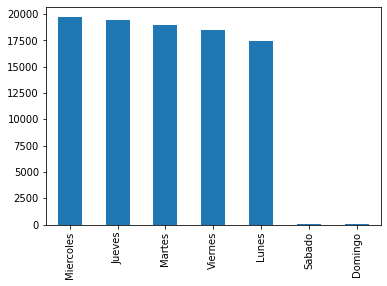

In [47]:
df["tramite_fecha_dia_de_la_semana"].value_counts().plot(kind='bar')

### Extraer de "tramite_fecha" el mes

In [48]:
def month(date):
    return datetime.strptime(date, '%Y-%m-%d').month

In [49]:
df.insert(3, "tramite_fecha_mes", df.apply(lambda row: month(row["tramite_fecha"]), axis=1))

<AxesSubplot:>

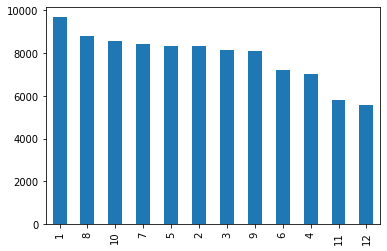

In [50]:
# Histograma

df["tramite_fecha_mes"].value_counts()
df["tramite_fecha_mes"].value_counts().plot(kind='bar')

### Extraer de "tramite_fecha" el año

In [51]:
def year(date):
    return datetime.strptime(date, '%Y-%m-%d').year

In [52]:
df.insert(4, "tramite_fecha_año", df.apply(lambda row: year(row["tramite_fecha"]), axis=1))

In [53]:
# Histograma

df["tramite_fecha_año"].value_counts()

2019    36837
2018    36814
2020    20393
Name: tramite_fecha_año, dtype: int64

<AxesSubplot:>

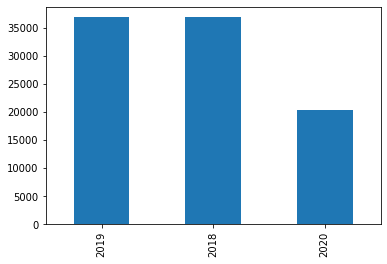

In [54]:
df["tramite_fecha_año"].value_counts().plot(kind='bar')

### Extraer antiguedad del automotor

In [55]:
 def years_in_the_middle(fecha_inicial, fecha_final):
    delta = 365.25
    try:
        date_tramite = datetime.strptime(fecha_final, '%Y-%m-%d')
        date_initial = datetime.strptime(fecha_inicial, '%Y-%m-%d')
        delta_time = (date_tramite - date_initial).days / delta
        return delta_time
    except:
        return '?'

In [56]:
df.insert(6, "antiguedad_atomotor", df.apply(lambda row: years_in_the_middle(row["fecha_inscripcion_inicial"], row["tramite_fecha"]), axis=1))

### Extraer edad titular

In [57]:
def years_in_the_middle_Y(año_inicial, fecha_final):
    delta = 365.25
    fecha_inicial = año_inicial + "-01-01"
    try:
        date_tramite = datetime.strptime(fecha_final, '%Y-%m-%d')
        date_initial = datetime.strptime(fecha_inicial, '%Y-%m-%d')
        delta_time = (date_tramite - date_initial).days / delta
        if (delta_time > 100) or (delta_time < 16):
            delta_time = '?'
        return delta_time
    except:
        return '?'       

In [58]:
df.insert(7, "edad_titular", df.apply(lambda row: years_in_the_middle_Y(row["titular_anio_nacimiento"], row["tramite_fecha"]), axis=1))

### Agrupamiento Provincias

In [59]:
def agrupamiento_prov(provincia):
    provincias = ['buenos aires', 'ciudad autónoma de bs.as.', 'córdoba', 'mendoza', 'santa fe']
    if provincia not in provincias:
        return 'otras'
    else:
        return provincia
# registro_seccional_provincia

In [60]:
df.insert(8, "prov_agrup", df.apply(lambda row: agrupamiento_prov(row["registro_seccional_provincia"]), axis=1))

## Trimestres

In [61]:
def agrupamiento_trim(tramite_fecha_mes):
    if tramite_fecha_mes in [1,2,3]:
        return 'Trim1'
    if tramite_fecha_mes in [4,5,6]:
        return 'Trim2'
    if tramite_fecha_mes in [7,8,9]:
        return 'Trim3'
    if tramite_fecha_mes in [10,11,12]:
        return 'Trim4'

df.insert(9, "trim_agrup", df.apply(lambda row: agrupamiento_trim(row["tramite_fecha_mes"]), axis=1))

# Sacar columnas que no usamos

In [66]:
df = df.drop(columns=['tramite_fecha', 'fecha_inscripcion_inicial', 'registro_seccional_codigo', 'registro_seccional_descripcion', 'automotor_anio_modelo', 'automotor_tipo_codigo', 'automotor_tipo_descripcion', 'automotor_marca_codigo', 'automotor_modelo_codigo', 'automotor_modelo_descripcion', 'automotor_uso_codigo', 'titular_domicilio_localidad', 'titular_domicilio_provincia', 'titular_anio_nacimiento', 'titular_pais_nacimiento', 'titular_porcentaje_titularidad', 'titular_domicilio_provincia_indec_id', 'titular_pais_nacimiento_indec_id'])

In [67]:
df.head()

,tramite_tipo,tramite_fecha_dia_de_la_semana,tramite_fecha_mes,tramite_fecha_año,antiguedad_atomotor,edad_titular,prov_agrup,trim_agrup,registro_seccional_provincia,automotor_origen,automotor_marca_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_genero
0,denuncia de robo o hurto,Miercoles,1,2018,17.2841,37.0431,buenos aires,Trim1,buenos aires,nacional,chevrolet,privado,física,masculino
1,denuncia de robo o hurto,Miercoles,1,2018,10.1164,28.0055,buenos aires,Trim1,buenos aires,nacional,peugeot,privado,física,femenino
2,denuncia de robo o hurto,Viernes,1,2018,22.9459,32.0301,buenos aires,Trim1,buenos aires,nacional,renault,privado,física,masculino
3,denuncia de robo o hurto,Martes,1,2018,18.2642,54.0041,buenos aires,Trim1,buenos aires,nacional,renault,privado,física,no identificado
4,denuncia de robo o hurto,Martes,1,2018,11.3402,57.0212,buenos aires,Trim1,buenos aires,nacional,peugeot,privado,física,femenino


In [68]:
df.to_csv("tmp2_pandas.csv", index=False)

In [69]:
clean('tmp2_pandas.csv')